In [1]:
import pandas as pd

In [2]:
class NormalDistribution():
    def __init__(self, x_min, x_max, mu_min, mu_max, sigma_min, sigma_max):
        """
        TBA
        :param x_min:
        :param x_max:
        :param mu_min:
        :param mu_max:
        :param sigma_min:
        :param sigma_max:
        """
        self.x_min = x_min
        self.x_max = x_max
        self.mu_min = mu_min
        self.mu_max = mu_max
        self.sigma_min = sigma_min
        self.sigma_max = sigma_max

In [3]:
x_min = -10
x_max = 10
mu_min = -3
mu_max = 3
sigma_min = 0.5
sigma_max = 3

nd = NormalDistribution(x_min, x_max, mu_min, mu_max, sigma_min, sigma_max)

In [4]:
df = pd.DataFrame.from_records([vars(nd)], columns=vars(nd).keys())

In [5]:
df

,x_min,x_max,mu_min,mu_max,sigma_min,sigma_max
0,-10,10,-3,3,0.5,3


In [6]:
nd1 = NormalDistribution(x_min, x_max, mu_min, mu_max, sigma_min, sigma_max)

In [7]:
df1 = pd.DataFrame.from_records([vars(nd1)], columns=vars(nd1).keys())

In [8]:
pd.concat([df, df1], ignore_index=True)

,x_min,x_max,mu_min,mu_max,sigma_min,sigma_max
0,-10,10,-3,3,0.5,3
1,-10,10,-3,3,0.5,3


In [9]:
df

,x_min,x_max,mu_min,mu_max,sigma_min,sigma_max
0,-10,10,-3,3,0.5,3


In [10]:
df.to_csv('test.csv')

In [11]:
new_df = pd.read_csv('test.csv', index_col=0)

In [12]:
new_df

,x_min,x_max,mu_min,mu_max,sigma_min,sigma_max
0,-10,10,-3,3,0.5,3


In [13]:
from scipy import stats as ss
import numpy as np

In [14]:
x_min = -10
x_max = 10
mu_min = -3
mu_max = 3
sigma_min = 0.5
sigma_max = 3

In [15]:
def gen_func(n_param_samples, grid_size_per_sample):
    while 1:
        mu = ss.uniform(mu_min, mu_max - mu_min).rvs(n_param_samples)
        sigma = ss.uniform(sigma_min, sigma_max - sigma_min).rvs(n_param_samples)
        x = np.linspace(x_min, x_max, grid_size_per_sample)
        # TODO Make sure that distributions don't get off the grid (truncated)?

        sampled_params = np.concatenate((mu[..., np.newaxis], sigma[..., np.newaxis]), 1)
        sampled_grid = ss.norm(mu[:, np.newaxis], sigma[:, np.newaxis]).logpdf(x[np.newaxis, :])

        yield (sampled_params, sampled_grid)

In [16]:
x = gen_func(100, 10)

In [17]:
next(x)[1]

array([[ -79.88888339,  -51.15190706,  -28.8738355 ,  -13.05466873,
          -3.69440674,   -0.79304953,   -4.3505971 ,  -14.36704945,
         -30.84240658,  -53.7766685 ],
       [  -6.88931171,   -4.20460061,   -2.49519276,   -1.76108819,
          -2.00228687,   -3.21878882,   -5.41059402,   -8.57770249,
         -12.72011423,  -17.83782922],
       [  -7.68636456,   -5.0111698 ,   -3.144797  ,   -2.08724617,
          -1.83851731,   -2.39861041,   -3.76752548,   -5.94526251,
          -8.9318215 ,  -12.72720246],
       [ -15.33583423,   -9.2549604 ,   -4.91220452,   -2.3075666 ,
          -1.44104664,   -2.31264464,   -4.9223606 ,   -9.27019451,
         -15.35614639,  -23.18021623],
       [ -38.1259664 ,  -24.75523322,  -14.37437022,   -6.98337741,
          -2.58225478,   -1.17100233,   -2.74962007,   -7.31810799,
         -14.8764661 ,  -25.42469439],
       [ -47.58628419,  -28.94664073,  -15.03598446,   -5.85431536,
          -1.40163345,   -1.67793872,   -6.68323117,  -16

In [18]:
# TODO Find a name for our module!
import random
import string
from abc import abstractmethod

import pandas as pd
from keras import Model, Input
from keras import backend
from keras.callbacks import Callback
from keras.layers import Dense, Concatenate, Reshape, Conv2D, Lambda


class ModelParameters(object):
    """
    TBA
    """

    def __init__(self, n_epochs, desired_grid_size, n_dense_layers, dense_scaling, depth,
                 n_kernels, kernel_size):
        """
        TBA
        :param n_epochs:
        :param desired_grid_size:
        :param n_dense_layers:
        :param dense_scaling:
        :param depth:
        :param n_kernels:
        :param kernel_size:
        """
        # TODO Consider using default values in function signature.
        self.name = self.__id_generator(6)
        self.n_epochs = n_epochs
        self.n_dense_layers = n_dense_layers
        self.dense_scaling = dense_scaling
        self.depth = depth
        self.n_kernels = n_kernels
        self.kernel_size = kernel_size

        self.out_dense_2 = (desired_grid_size + kernel_size - 1) // n_dense_layers
        self.grid_size = self.out_dense_2 * n_dense_layers - kernel_size + 1

        # TODO Give feedback about parameter settings (especially grid_size).

    @staticmethod
    def __id_generator(size=6, chars=string.ascii_uppercase + string.digits):
        """
        TBA
        :param size:
        :param chars:
        :return:
        """
        return ''.join(random.choice(chars) for _ in range(size))

    def get_params(self):
        """
        TBA
        :return:
        """
        return pd.DataFrame.from_records([vars(self)], columns=vars(self).keys())


class Distribution(object):
    """
    TBA
    """

    def __init__(self, name):
        """
        TBA
        :param name:
        """
        self.name = name

    @abstractmethod
    def gen_data(self, n_vectors, n_samples):
        """
        TBA
        :param n_vectors:
        :param n_samples:
        :return:
        """
        raise NotImplementedError

    def get_params(self):
        """
        TBA
        :return:
        """
        return pd.DataFrame.from_records([vars(self)], columns=vars(self).keys())


class LossHistory(Callback):
    """
    TBA
    """

    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))


def create_model(p):
    """
    TBA
    :type p: ModelParameters
    :return:
    """
    model = Input(shape=(2,), name='input')

    dense_1, dense_2, dense_reshape = [], [], []

    for i in range(p.n_dense_layers):
        dense_1.append(Dense(p.dense_scaling * p.depth, activation='relu',
                             name='level_1_dense_{:02d}'.format(i))(model))

        dense_2.append(Dense(p.out_dense_2 * p.depth, activation='relu',
                             name='level_2_dense_{:02d}'.format(i))(dense_1[-1]))

        dense_reshape.append(Reshape(target_shape=(p.out_dense_2, p.depth, 1))(dense_2[-1]))

    concat = Concatenate(axis=-1)(dense_reshape)
    dense_reshape = Reshape(target_shape=(p.grid_size + p.kernel_size - 1, p.depth, 1))(concat)

    conv = Conv2D(filters=p.n_kernels, kernel_size=(p.kernel_size, p.depth), strides=1)(
        dense_reshape)

    avg = Lambda(lambda x: backend.sum(x, axis=-1), output_shape=lambda d: (d[0], d[1]))(conv)
    avg_reshape = Reshape(target_shape=(p.grid_size,))(avg)

    model = Model(model, avg_reshape)

    return model


Using TensorFlow backend.


In [19]:
import numpy as np
from scipy import stats as ss


class NormalDistribution(Distribution):
    def __init__(self, name, x_min, x_max, mu_min, mu_max, sigma_min, sigma_max):
        """
        TBA
        :param name:
        :param x_min:
        :param x_max:
        :param mu_min:
        :param mu_max:
        :param sigma_min:
        :param sigma_max:
        """
        super().__init__(name)
        self.x_min = x_min
        self.x_max = x_max
        self.mu_min = mu_min
        self.mu_max = mu_max
        self.sigma_min = sigma_min
        self.sigma_max = sigma_max

        # TODO Add check here once we know what ranges it works best for.

    def gen_data(self, n_param_samples, grid_size_per_sample):
        """
        TBA
        :param n_param_samples:
        :param grid_size_per_sample:
        :return:
        """
        mu = ss.uniform(self.mu_min, self.mu_max - self.mu_min).rvs(n_param_samples)
        sigma = ss.uniform(self.sigma_min, self.sigma_max - self.sigma_min).rvs(n_param_samples)
        x = np.linspace(self.x_min, self.x_max, grid_size_per_sample)
        # TODO Make sure that distributions don't get off the grid (truncated)?

        sampled_params = np.concatenate((mu[..., np.newaxis], sigma[..., np.newaxis]), 1)
        sampled_grid = ss.norm(mu[:, np.newaxis], sigma[:, np.newaxis]).logpdf(x[np.newaxis, :])

        return sampled_params, sampled_grid

    def gen_fun(self, n_params_samples, grid_size_per_sample):
        while 1:
            mu = ss.uniform(self.mu_min, self.mu_max - self.mu_min).rvs(n_param_samples)
            sigma = ss.uniform(self.sigma_min, self.sigma_max - self.sigma_min).rvs(n_param_samples)
            x = np.linspace(self.x_min, self.x_max, grid_size_per_sample)
            # TODO Make sure that distributions don't get off the grid (truncated)?
    
            sampled_params = np.concatenate((mu[..., np.newaxis], sigma[..., np.newaxis]), 1)
            sampled_grid = ss.norm(mu[:, np.newaxis], sigma[:, np.newaxis]).logpdf(x[np.newaxis, :])
    
            return sampled_params, sampled_grid

In [20]:
def gen_fun(n_param_samples, grid_size_per_sample):
    while 1:
        mu = ss.uniform(mu_min, mu_max - mu_min).rvs(n_param_samples)
        sigma = ss.uniform(sigma_min, sigma_max - sigma_min).rvs(n_param_samples)
        x = np.linspace(x_min, x_max, grid_size_per_sample)
        # TODO Make sure that distributions don't get off the grid (truncated)?

        sampled_params = np.concatenate((mu[..., np.newaxis], sigma[..., np.newaxis]), 1)
        sampled_grid = ss.norm(mu[:, np.newaxis], sigma[:, np.newaxis]).logpdf(x[np.newaxis, :])

        yield (sampled_params, sampled_grid)

In [81]:
# NN Settings.
n_thetas = 100000
desired_grid_size = 100
n_epochs = 10
n_dense_layers = 20
dense_scaling = 1
depth = 25
n_kernels = 15
kernel_size = 40

# ND Settings.
# As these are fixed in this example, we could instead simply create one NormalDistribution object
# instead; however, once we run tests on different sets of parameters for this distribution
# we'll have to create a new one anyway.
x_min = -10
x_max = 10
mu_min = -3
mu_max = 3
sigma_min = 0.5
sigma_max = 3

In [82]:
p = ModelParameters(n_epochs, desired_grid_size, n_dense_layers, dense_scaling, depth, n_kernels, kernel_size)

In [83]:
model = create_model(p)

In [84]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
batch_size = 64
s_p_e = np.ceil(n_thetas / batch_size)

In [88]:
model.fit_generator(gen_fun(batch_size, p.grid_size), steps_per_epoch=s_p_e, epochs=p.n_epochs, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6254
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0932
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0510
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0662
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0527
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0573
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0632
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0277
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0559
Epoch 10/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0467


In [89]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt


In [90]:
def log_likelihood(model, theta, x_grid, x):
    if np.abs(theta[0]) > mu_max or theta[1] < sigma_min or theta[1] > sigma_max: # TODO Adjust this accordingly.
        return -1e9
    
    theta = np.atleast_2d(theta)
    likelihood_on_grid = model.predict(theta).T
    
    points = np.atleast_2d(x_grid).T

    ll = griddata(x_grid, likelihood_on_grid, x, fill_value=-1e9)
    
    return ll

In [91]:
def get_summed_ll(model, theta, x_grid, x):
    return np.sum(log_likelihood(model, theta, x_grid, x))

In [92]:
def estimate_mu(model, x_grid, x):
    return optimize.minimize(lambda theta: -get_summed_ll(model, theta, x_grid, x), 
                             x0=[0, 1], 
                             method='Nelder-Mead').x[0:2]

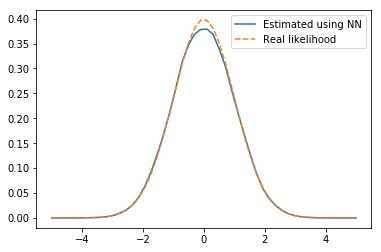

In [93]:
theta = np.array([0, 1]) # Mean 0, SD 1.
test_grid = np.linspace(x_min, x_max, p.grid_size)
samples = np.linspace(-5, 5)
ll = log_likelihood(model, theta, test_grid, samples)
    
plt.plot(samples, np.exp(ll), label='Estimated using NN')
plt.plot(samples, ss.norm().pdf(samples), ls='--', label='Real likelihood')
plt.legend()